In [18]:
import pygrib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
import numpy as np
from datetime import datetime

from scipy import interpolate

from pathlib import Path

In [20]:
import cdsapi
from tqdm import tqdm

c = cdsapi.Client()

print('getting data...')

c.retrieve(
'reanalysis-era5-land-monthly-means',
{
    'variable': '2m_temperature',
    'product_type': 'monthly_averaged_reanalysis',
    'year': [
#         '1950', '1951', '1952',
#         '1953', '1954', '1955',
#         '1956', '1957', '1958',
#         '1959', '1960', '1961',
#         '1962', '1963', '1964',
#         '1965', '1966', '1967',
#         '1968', '1969', '1970',
#         '1971', '1972', '1973',
#         '1974', '1975', '1976',
#         '1977', '1978', '1979',
#         '1980', '1981', '1982',
#         '1983', '1984', '1985',
#         '1986', '1987', '1988',
#         '1989', '1990', '1991',
#         '1992', '1993', '1994',
#         '1995', '1996', '1997',
#         '1998', '1999', '2000',
#         '2001', '2002', '2003',
#         '2004', '2005', '2006',
#         '2007', '2008', '2009',
#         '2010', '2011', '2012',
#         '2013', '2014', '2015',
#         '2016', '2017', '2018',
#         '2019', '2020', '2021',
#         '2022', 
        '2023',
    ],
    'month': [
        '01', '02', '03',
        '04', '05', '06',
        '07', '08', '09',
        #'10', '11', '12',
    ],
    'format': 'grib',
    'time': '00:00',
    'area': [
        47, 13, 42,
        20,
    ],
},
'cro/cro_monthly_only_2023.grib')


2023-10-07 11:06:12,709 INFO Welcome to the CDS
2023-10-07 11:06:12,709 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land-monthly-means


getting data...


2023-10-07 11:06:12,807 INFO Request is queued
2023-10-07 11:06:13,854 INFO Request is running
2023-10-07 11:06:17,701 INFO Request is completed
2023-10-07 11:06:17,701 INFO Downloading https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/adaptor.mars.internal-1696673173.0231528-5714-16-02e4328b-7315-4b6d-809c-c6149c872ff0.grib to cro/cro_monthly_only_2023.grib (51.7K)
2023-10-07 11:06:18,011 INFO Download rate 167K/s


Result(content_length=52920,content_type=application/x-grib,location=https://download-0005-clone.copernicus-climate.eu/cache-compute-0005/cache/data0/adaptor.mars.internal-1696673173.0231528-5714-16-02e4328b-7315-4b6d-809c-c6149c872ff0.grib)

In [57]:
city = 'Čakovec'

if city == 'Čakovec':
    location = np.array([46.3897, 16.438]) # cakovec
elif city == 'Zagreb':
    location = np.array([45.8150, 15.9819]) # zagreb
elif city == 'Gospić':
    location = np.array([44.5469, 15.3750])
elif city == 'Hum':
    location = np.array([45.3491, 14.0494])
elif city == 'Sisak':
    location = np.array([45.4851, 16.3731])
elif city == 'Novi Marof':
    location = np.array([46.1669, 16.3353])
else:
    assert 0
    
dates = []
vals = []

for glob_file in ['cro/cro_monthly_all_2023.grib', 'cro/cro_monthly_only_2023.grib']:
    grbs = pygrib.open(str(glob_file))

    grb_select = grbs.select()

    for grb in grb_select:
        data = np.asarray(grb.values) - 273.15

        lons = np.linspace(float(grb['longitudeOfFirstGridPointInDegrees']), \
        float(grb['longitudeOfLastGridPointInDegrees']), int(grb['Ni']) )

        lats = np.linspace(float(grb['latitudeOfFirstGridPointInDegrees']), \
        float(grb['latitudeOfLastGridPointInDegrees']), int(grb['Nj']) )

        interpolated_value = interpolate.interpn((lats[::-1], lons), data[::-1, :], location, method='linear')

        date = datetime(day=grb['day'], month=grb['month'], year=grb['year']).date()

        if glob_file == 'cro/cro_monthly_all_2023.grib' and grb['year'] == 2023:
            continue
            
        vals.append(interpolated_value)
        dates.append(date)   

    
    

In [58]:
dates

[datetime.date(1950, 1, 1),
 datetime.date(1950, 2, 1),
 datetime.date(1950, 3, 1),
 datetime.date(1950, 4, 1),
 datetime.date(1950, 5, 1),
 datetime.date(1950, 6, 1),
 datetime.date(1950, 7, 1),
 datetime.date(1950, 8, 1),
 datetime.date(1950, 9, 1),
 datetime.date(1950, 10, 1),
 datetime.date(1950, 11, 1),
 datetime.date(1950, 12, 1),
 datetime.date(1951, 1, 1),
 datetime.date(1951, 2, 1),
 datetime.date(1951, 3, 1),
 datetime.date(1951, 4, 1),
 datetime.date(1951, 5, 1),
 datetime.date(1951, 6, 1),
 datetime.date(1951, 7, 1),
 datetime.date(1951, 8, 1),
 datetime.date(1951, 9, 1),
 datetime.date(1951, 10, 1),
 datetime.date(1951, 11, 1),
 datetime.date(1951, 12, 1),
 datetime.date(1952, 1, 1),
 datetime.date(1952, 2, 1),
 datetime.date(1952, 3, 1),
 datetime.date(1952, 4, 1),
 datetime.date(1952, 5, 1),
 datetime.date(1952, 6, 1),
 datetime.date(1952, 7, 1),
 datetime.date(1952, 8, 1),
 datetime.date(1952, 9, 1),
 datetime.date(1952, 10, 1),
 datetime.date(1952, 11, 1),
 datetime.da

In [59]:
data_by_year = {}

for date, temp in zip(dates, vals):
    if date.year not in data_by_year:
        data_by_year[date.year] = []
    
    data_by_year[date.year].append((date, temp))

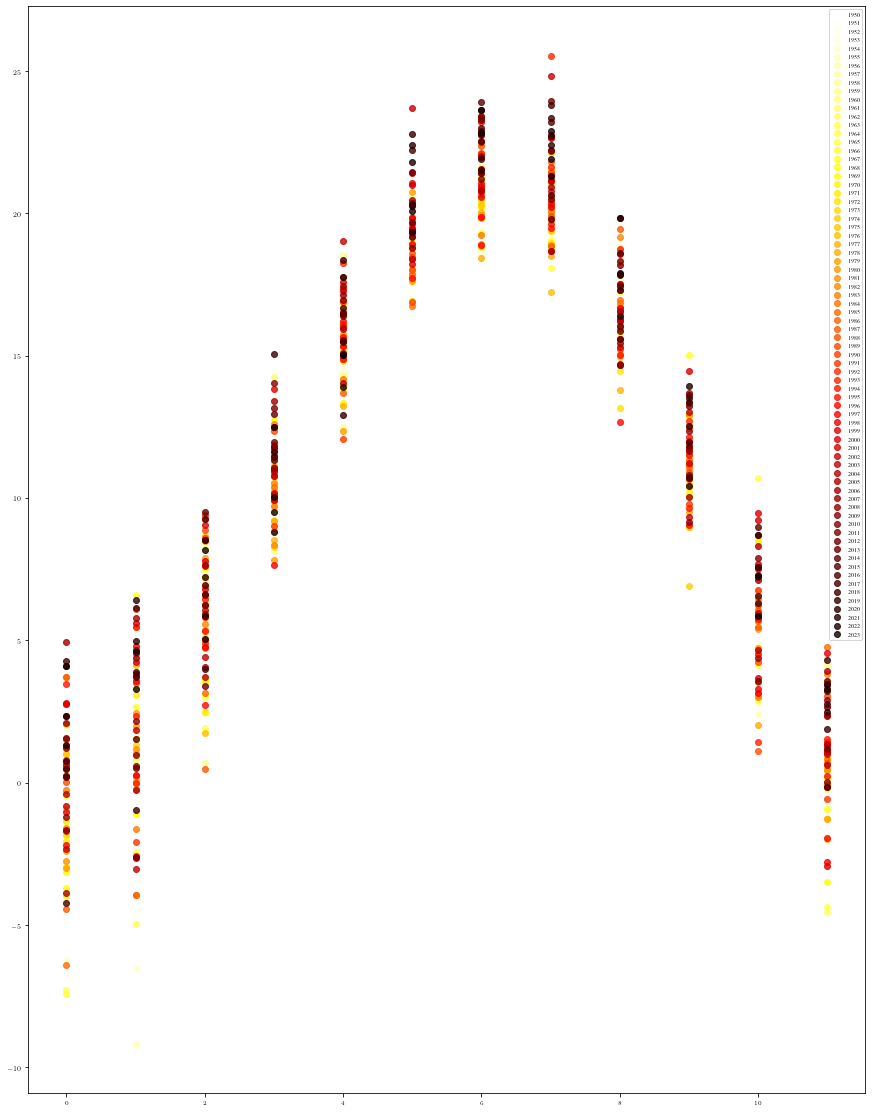

In [60]:
%matplotlib inline

from matplotlib import cm

fig, ax = plt.subplots(1, 1, figsize=(15, 20))

for i, year in enumerate(list(data_by_year.keys())):   
    ax.scatter(range(len(data_by_year[year])), [x[1] for x in data_by_year[year]], color=cm.hot_r(i / (len(data_by_year))), label=year, alpha=0.8)
    
    
ax.legend()

In [61]:
mean_data_by_year_and_month = {}

for date, temp in zip(dates, vals):
    if date.year not in mean_data_by_year_and_month:
        mean_data_by_year_and_month[date.year] = {}
    
    if date.month not in mean_data_by_year_and_month[date.year]:
        mean_data_by_year_and_month[date.year][date.month] = []
    
    mean_data_by_year_and_month[date.year][date.month] = temp
    

In [62]:
from tueplots import bundles

In [63]:
today = datetime.now()

print(datetime.strftime(today, '%d.%m.%Y.'))

07.10.2023.


In [64]:
mean_data_by_year_and_month

{1950: {1: array([-3.92108473]),
  2: array([2.16600973]),
  3: array([7.16526371]),
  4: array([10.59793539]),
  5: array([17.45363289]),
  6: array([22.08806133]),
  7: array([24.73226949]),
  8: array([23.57722035]),
  9: array([17.95837328]),
  10: array([9.77374215]),
  11: array([6.32162965]),
  12: array([1.6934075])},
 1951: {1: array([2.14217332]),
  2: array([4.12665258]),
  3: array([5.94950293]),
  4: array([10.69195148]),
  5: array([15.28884363]),
  6: array([19.19503613]),
  7: array([20.4798768]),
  8: array([21.68864457]),
  9: array([18.75314555]),
  10: array([10.02102523]),
  11: array([8.63437781]),
  12: array([2.18504426])},
 1952: {1: array([-0.88620113]),
  2: array([-1.14019891]),
  3: array([3.55535188]),
  4: array([13.48915496]),
  5: array([15.21169738]),
  6: array([19.79634895]),
  7: array([23.37582977]),
  8: array([24.01360266]),
  9: array([15.64247504]),
  10: array([10.7684323]),
  11: array([3.60207242]),
  12: array([-0.80353484])},
 1953: {1: ar

In [65]:
ticks = list(mean_data_by_year_and_month.keys())

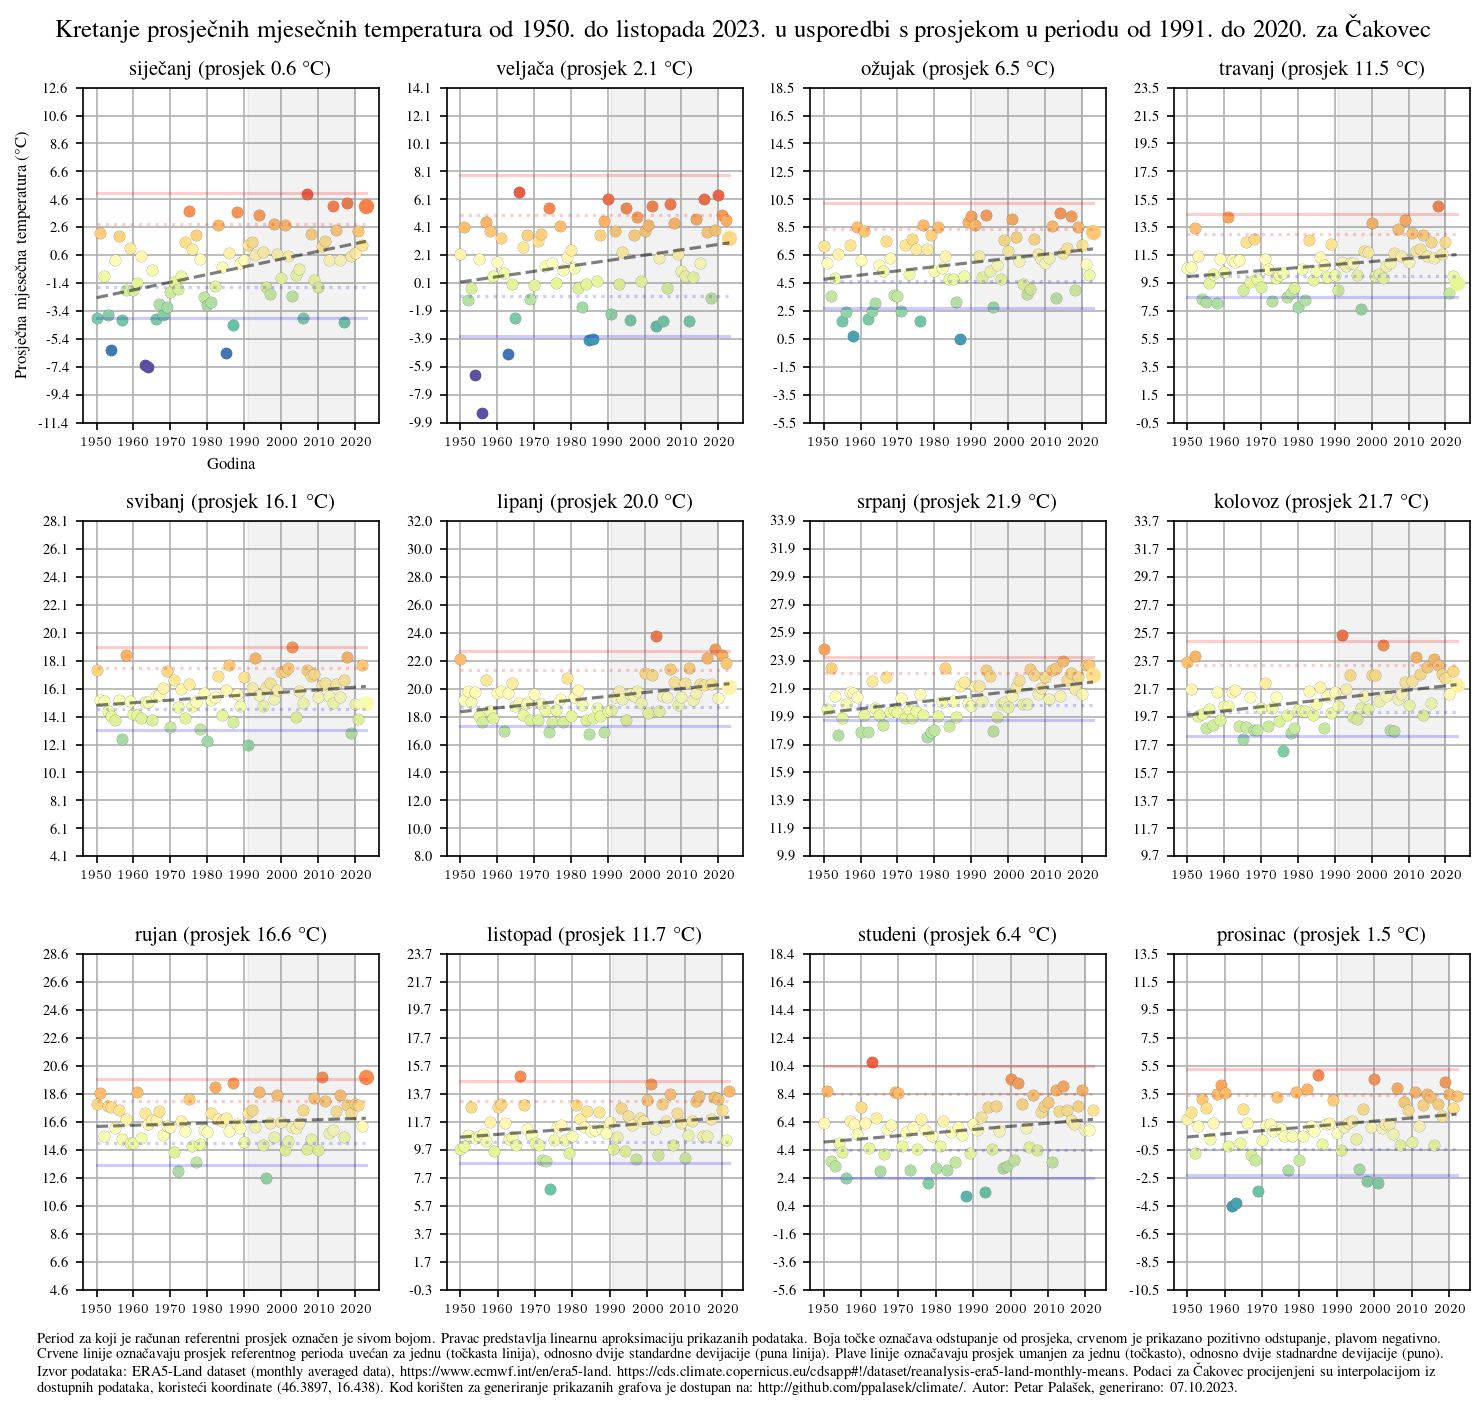

In [66]:
from matplotlib.ticker import LinearLocator


plt.rcParams.update(bundles.icml2022())
plt.rcParams.update({"figure.dpi": 150})
plt.rcParams.update({"font.size": 10})
plt.rcParams.update({"axes.titlesize": 10})

plt.rcParams.update({"xtick.labelsize": 6})
plt.rcParams.update({"ytick.labelsize": 7})

plt.rcParams['figure.constrained_layout.use'] = False


months = ['siječanj', 'veljača', 'ožujak', 'travanj', 'svibanj', 'lipanj', 'srpanj', 'kolovoz', 'rujan', 'listopad', 'studeni', 'prosinac']
 
fig, axs = plt.subplots(3, 4, figsize=(10, 9))

offset_y = 11

ref_start_year = 1991 #1971
ref_end_year = 2020 # 2000


for month in range(1, 13):
    r = (month - 1) // 4
    c = (month - 1) % 4

    all_years = []
    all_years_for_mean = []
    
    
    axs[r, c].grid(True)
    
    for i, year in enumerate(mean_data_by_year_and_month):        
        if month in mean_data_by_year_and_month[year]:
            all_years.append(mean_data_by_year_and_month[year][month])
            
            if year > ref_start_year - 1 and year < ref_end_year + 1:
                all_years_for_mean.append(mean_data_by_year_and_month[year][month])

    all_years_mean = np.asarray(all_years_for_mean).mean()
    
    
    axs[r, c].axvspan(ref_start_year, ref_end_year, alpha=0.1, color='gray')
    axs[r, c].set_axisbelow(True)

    for i, year in enumerate(mean_data_by_year_and_month):       
        if month in mean_data_by_year_and_month[year]:                   
            axs[r, c].scatter(year, mean_data_by_year_and_month[year][month] - all_years_mean, color='black', alpha=0.5, s=21)
            axs[r, c].scatter(year, mean_data_by_year_and_month[year][month] - all_years_mean, color=cm.Spectral_r(((mean_data_by_year_and_month[year][month] - all_years_mean) + 8 )/15), s=20)
            
    
    
    
            if year == 2023:
                axs[r, c].scatter(year, mean_data_by_year_and_month[year][month] - all_years_mean, color=cm.Spectral_r(((mean_data_by_year_and_month[year][month] - all_years_mean) + 8 )/15), s=40)
        
    x = np.asarray(range(len(all_years)))
    
    axs[r, c].plot(x+ 1950, [np.asarray(all_years_for_mean).std()] * len(x), color='red', linestyle=':', alpha=0.2)  
    axs[r, c].plot(x+ 1950, [2 * np.asarray(all_years_for_mean).std()] * len(x), color='red', linestyle='-', alpha=0.2)  
    axs[r, c].plot(x+ 1950, [-np.asarray(all_years_for_mean).std()] * len(x), color='blue', linestyle=':', alpha=0.2)  
    axs[r, c].plot(x+ 1950, [-2 * np.asarray(all_years_for_mean).std()] * len(x), color='blue', linestyle='-', alpha=0.2)  

                   
    a, b = np.polyfit(x, all_years, 1)
        
    axs[r, c].plot(x + 1950, a * x + b - all_years_mean, color='black', linestyle='--', alpha=0.5)  

    axs[r, c].set_ylim(-11, 11)

    axs[r, c].set_yticks(range(-offset_y - 1, offset_y + 2,  2))
    axs[r, c].set_yticklabels(['{:2.1f}'.format(all_years_mean + x) for x in range(-offset_y - 1, offset_y + 2, 2)])

    
    axs[r, c].set_xticks(ticks[::10])
    
    if r == 0 and c == 0:
        axs[r, c].set_xlabel('Godina')
        axs[r, c].set_ylabel('Prosječna mjesečna temperatura (°C)')

    axs[r, c].title.set_text('{} (prosjek {:2.1f} °C)'.format(months[month - 1], all_years_mean))
      

fig.suptitle('Kretanje prosječnih mjesečnih temperatura od 1950. do listopada 2023. u usporedbi s prosjekom u periodu od {}. do {}. za {}'.format(ref_start_year, ref_end_year, city))

fig.align_ylabels()

txt = 'Period za koji je računan referentni prosjek označen je sivom bojom. Pravac predstavlja linearnu aproksimaciju prikazanih podataka. Boja točke označava odstupanje od prosjeka, crvenom je prikazano pozitivno odstupanje, plavom negativno.\nCrvene linije označavaju prosjek referentnog perioda uvećan za jednu (točkasta linija), odnosno dvije standardne devijacije (puna linija). Plave linije označavaju prosjek umanjen za jednu (točkasto), odnosno dvije stadnardne devijacije (puno).\nIzvor podataka: ERA5-Land dataset (monthly averaged data), https://www.ecmwf.int/en/era5-land. https://cds.climate.copernicus.eu/cdsapp\#!/dataset/reanalysis-era5-land-monthly-means. Podaci za {} procijenjeni su interpolacijom iz\ndostupnih podataka, koristeći koordinate ({}, {}). Kod korišten za generiranje prikazanih grafova je dostupan na: http://github.com/ppalasek/climate/. Autor: Petar Palašek, generirano: {}'.format(city, location[0], location[1], datetime.strftime(today, '%d.%m.%Y.'))
plt.figtext(0.03, -0.04, txt, wrap=True, horizontalalignment='left', fontsize=7)

plt.tight_layout()

plt.savefig('_monthly_image_{}_200_new.png'.format(city), dpi=200, transparent=False, bbox_inches='tight', facecolor="white")

plt.show()
